In [1]:
include("src/Trajectories.jl")
using .QuTaM

In [2]:
using LinearAlgebra

In [3]:
# Create a data set of trajectories
# Using rf as basis
sys = QuTaM.rd_sys
params = QuTaM.rd_params

SimulParameters(psi0=ComplexF64[0.0 + 0.0im, 1.0 + 0.0im]
nsamples=50000
seed=1
ntraj=500)
multiplier=10.5
tf=3.0
dt=0.00063
eps=0.001)

In [16]:
t = [1, 2, 3]
cumsum(t)

3-element Vector{Int64}:
 1
 3
 6

In [4]:
# Now from each trajectory, generate the states the given times
sample_clicks = QuTaM.run_trajectories(sys, params)
ntimes = 1000
t = collect(LinRange(0, params.tf, ntimes))
sample = Array{ComplexF64}(undef, params.ntraj, ntimes, sys.NLEVELS );
for n in 1:params.ntraj
    try 
        sample[n, :, :] = QuTaM.evaluate_at_t(t, sample_clicks[n], sys,  params.psi0)
    catch
        println("Empty value? n=$(n)")
        sample[n, :, :] = [nothing ,nothing, nothing]
    end 
end 

In [5]:
QuTaM.evaluate_at_t(t, sample_clicks[3458], sys,  params.psi0)

LoadError: BoundsError: attempt to access 500-element Vector{Vector{Main.QuTaM.DetectionClick}} at index [3458]

In [6]:
isempty(sample_clicks[3458])

LoadError: BoundsError: attempt to access 500-element Vector{Vector{Main.QuTaM.DetectionClick}} at index [3458]

In [7]:
# Average over the trajectories
using Statistics
states_avg = dropdims(mean(sample, dims=1), dims=1)  # Drop the extra dimension

1000×2 Matrix{ComplexF64}:
        0.0+0.0im               1.0+0.0im
 0.00799999+1.33556e-5im    0.99199-0.00446845im
  0.0239996-3.70485e-5im   0.975911-0.0131888im
  0.0339989-3.19498e-5im   0.965647-0.0261049im
  0.0459974-5.19272e-5im   0.953032-0.0429584im
   0.053996+1.7929e-5im    0.943841-0.0638703im
  0.0679914-7.10908e-5im   0.927833-0.0880307im
  0.0739884+5.77246e-5im   0.918644-0.116483im
  0.0799845+0.000202783im   0.90793-0.148536im
  0.0919752+0.000138648im   0.88941-0.182796im
  0.0939719+0.000469179im  0.878337-0.22217im
   0.103959+0.000454428im  0.856694-0.262472im
   0.111946+0.000527465im  0.833751-0.30562im
           ⋮               
  -0.610733-0.337523im          0.0+0.0im
  -0.609206-0.340271im          0.0+0.0im
  -0.607667-0.343012im          0.0+0.0im
  -0.606116-0.345745im          0.0+0.0im
  -0.604552-0.348472im          0.0+0.0im
  -0.602977-0.351192im          0.0+0.0im
  -0.601388-0.353904im          0.0+0.0im
  -0.599788-0.35661im           0.0+0.0i

In [15]:
norm(states_avg[100])

0.5783939128155898

In [8]:
z = zeros(ComplexF64, ntimes)
for n in 1:ntimes
    z[n] = dot(states_avg[n, :], QuTaM.sigma_z * states_avg[n, :]) 
end  


In [9]:
dot(params.psi0, QuTaM.sigma_z * params.psi0)

1.0 + 0.0im

In [10]:
QuTaM.sigma_z

2×2 Matrix{ComplexF64}:
 -1.0+0.0im  0.0+0.0im
  0.0+0.0im  1.0+0.0im

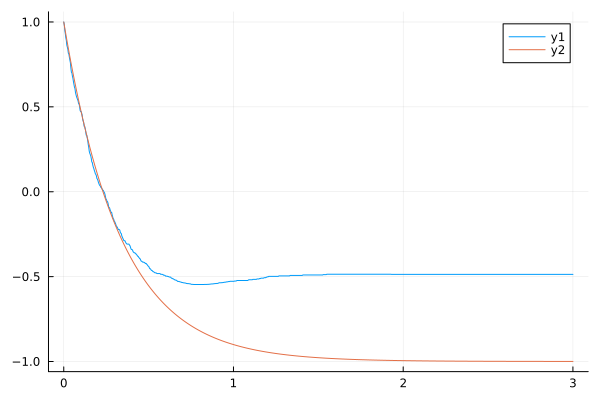

In [11]:
using Plots
plot(t, real(z))
plot!(t, 2*exp.(-QuTaM.rd_gamma.*t).-1)

# 